# A-gs model and implementation (simulation CO2 and H2O flux)

## Initialize data and model

### Setup and fetch data

In [1]:
# Settings
Username   = 'Beheerder'
years      = range(2001,2021)    #(1997,2021) # Set years to download

In [2]:
import os
datapath = os.path.join('../')
#print('datapath is set to %s'%datapath)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import plotly.express as px
#import cufflinks as cf
import matplotlib.dates as mdate
import matplotlib.ticker as ticker
from matplotlib import cm
#from colorspacious import cspace_converter
import scipy.stats as stats
#cf.go_offline()
#cf.set_config_file(offline=False, world_readable=True)

from datetime import datetime, timedelta
import sys
sys.path.insert(0, os.path.join(datapath,'PythonScripts'))
from Loobos_Toolbox import dateparse, dateparse_Gapfilled, Read_LoobosEddFinal, Read_LooStor, Read_LoodatGapfill, Read_Loobos_halfhourly, Read_Loobos_meteo, Read_Loobos_soil, Read_Loobos_profile
from Ags_model import runAgs, calc_LE

In [3]:
import matplotlib.dates as mdates

In [4]:
#these next two lines are to prevent re-loading the data. If you want to re-load data, instead comment them out
if not 'progress' in globals(): progress = list()
if not 'dataloaded' in progress:
  # Read files
    df_EC           = Read_LoobosEddFinal    (years,datapath)
    df_Stor         = Read_LooStor           (years,datapath)
    df_Comb         = Read_LoodatGapfill     (years,datapath)
    df_NEE          = Read_Loobos_halfhourly (years,datapath)
    df_meteo        = Read_Loobos_meteo      (years,datapath)
    df_soil         = Read_Loobos_soil       (years,datapath) 
    df_profile      = Read_Loobos_profile    (years,datapath)
    progress.append('dataloaded')

Loading 2001
Loading 2002
Loading 2003
Loading 2004
Loading 2005
Loading 2006
Loading 2007
Loading 2008
Loading 2009
Loading 2010
Loading 2011
Loading 2012
Loading 2013
Loading 2014
Loading 2015
Loading 2016
Loading 2017
Loading 2018
Loading 2019
Loading 2020
df_EC loaded. Columns in this dataframe:
Index(['Doy', 'Dtime', 'Flx_Tsonic', 'Flx_Lo-H2O', 'Flx_Lo-CO2', 'Qf_Tsonic',
       'Qf_Lo-H2O', 'Qf_Lo-CO2', 'Mea_Windsp', 'Mea_Tsonic', 'Mea_Lo-H2O',
       'Mea_Lo-CO2', 'U-star', 'Z-over-L', 'Wind-Dir', '80PercFlux'],
      dtype='object')
Loading 2001


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2002


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2003


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2004


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2005
Loading 2006


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2007


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2008


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2009


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2010


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2011
Loading 2012


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2013


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2014


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2015


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2016


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2017
Loading 2018


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2019
Loading 2020


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:80: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_Stor       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


df_Stor loaded. Columns in this dataframe:
Index(['Day', 'Time', 'TotalT', 'TotalTflux', 'TotalH2O', 'TotalH2Oflux',
       'TotalCO2', 'TotalCO2flux', 'CO2-2.5m', 'CO2flux-2.5m'],
      dtype='object')
Loading 2001
Loading 2002
Loading 2003
Loading 2004
Loading 2005
Loading 2006
Loading 2007
Loading 2008
Loading 2009
Loading 2010
Loading 2011
Loading 2012
Loading 2013
Loading 2014
Loading 2015
Loading 2016
Loading 2017
Loading 2018
Loading 2019
Loading 2020
df_Comb loaded. Columns in this dataframe:
Index(['Year', 'DoY', 'Hour', 'qcNEE', 'NEE', 'LE', 'H', 'Rg', 'Tair', 'Tsoil',
       'rH', 'Ustar', 'VPD', 'NEE_orig', 'NEE_f', 'NEE_fqc', 'NEE_fall',
       'NEE_fall_qc', 'NEE_fnum', 'NEE_fsd', 'NEE_fmeth', 'NEE_fwin',
       'Rg_orig', 'Rg_f', 'Rg_fqc', 'Rg_fall', 'Rg_fall_qc', 'Rg_fnum',
       'Rg_fsd', 'Rg_fmeth', 'Rg_fwin', 'H_orig', 'H_f', 'H_fqc', 'H_fall',
       'H_fall_qc', 'H_fnum', 'H_fsd', 'H_fmeth', 'H_fwin', 'LE_orig', 'LE_f',
       'LE_fqc', 'LE_fall', 'LE_fall_qc', 'L

C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)


Loading 2002


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)


Loading 2003


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)


Loading 2004


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)


Loading 2005
Loading 2006


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)


Loading 2007


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)


Loading 2008
Loading 2009


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)


Loading 2010


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)


Loading 2011
Loading 2012


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)


Loading 2013
Loading 2014


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)


Loading 2015


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)


Loading 2016
Loading 2017


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)


Loading 2018
Loading 2019


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)


Loading 2020


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_tmp      = pd.read_csv(infilename, index_col='DateTime'   , parse_dates=['DateTime'   ], date_parser=dateparse_Gapfilled)


Done
df_NEE loaded. Columns in this dataframe:
Index(['NEE_f', 'H_f', 'LE_f', 'Reco_f', 'GPP_f', 'NEE_fqc', 'H_fqc', 'LEfqc',
       'Reco', 'Tair', 'Rg_f', 'VPD', 'Tsoil', 'rH', 'Ustar', 'R-ref', 'E_0'],
      dtype='object')
Loading 2001


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2002


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2003


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2004


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2005


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2006


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2007


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2008


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2009


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2010


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2011


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2012


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2013


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2014


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2015


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2016


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2017


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2018


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2019
Loading 2020


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


df_meteo loaded. Columns in this dataframe:
Index(['Daynumber', 'Time', 'S(i)', 'S(o)', 'L(i)', 'L(o)', 'G1', 'PAR',
       'H2OLic', 'CO2Lic', '-q', 'Te(vaisal)', 'Te-L(i)', 'Te-L(o)', '-u(z)',
       '-u(dir)', 'Min u(z)', 'WSC therm', 'SD S(i)', 'SD S(o)', 'SD L(i)',
       'SD L(o)', 'SD G1', 'SD PAR', 'SD H2OLic', 'SD CO2Lic', 'SD q',
       'SD Te(vaisal)', 'Battery V', 'CR10 temp', 'P(mast)00', 'P(guter)00',
       'P(mast)05', 'P(guter)05', 'P(mast)10', 'P(guter)10', 'P(mast)15',
       'P(guter)15', 'P(mast)20', 'P(guter)20', 'P(mast)25', 'P(guter)25',
       'P(mast)', 'P(guter)', 'P(field)', 'L(i)corr', 'L(o)corr', 'R(net)',
       'P(guter)corr', 'Pcorr', 'PARrefl', 'PARdiff', 'H2Olic', 'CO2lic',
       'Vbatt', 'CR10temp', 'SD u(z)', '#NAME?', '#NAME?.1', '#NAME?.2'],
      dtype='object')
Loading ../\Soilmoist\Final\Loosoifinal01.csv...
Loading ../\Soilmoist\Final\Loosoifinal02.csv...


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading ../\Soilmoist\Final\Loosoifinal03.csv...


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading ../\Soilmoist\Final\Loosoifinal04.csv...


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading ../\Soilmoist\Final\Loosoifinal05.csv...
Loading ../\Soilmoist\Final\Loosoifinal06.csv...


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading ../\Soilmoist\Final\Loosoifinal07.csv...
Loading ../\Soilmoist\Final\Loosoifinal08.csv...


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading ../\Soilmoist\Final\Loosoifinal09.csv...
Loading ../\Soilmoist\Final\Loosoifinal10.csv...


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future vers

Loading ../\Soilmoist\Final\Loosoifinal11.csv...
Loading ../\Soilmoist\Final\Loosoifinal12.csv...


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading ../\Soilmoist\Final\Loosoifinal13.csv...
Loading ../\Soilmoist\Final\Loosoifinal14.csv...


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading ../\Soilmoist\Final\Loosoifinal15.csv...


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading ../\Soilmoist\Final\Loosoifinal16.csv...
Loading ../\Soilmoist\Final\Loosoifinal17.csv...


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future vers

Loading ../\Soilmoist\Final\Loosoifinal18.csv...
Loading ../\Soilmoist\Final\Loosoifinal19.csv...


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:188: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_soil       .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading ../\Soilmoist\Final\Loosoifinal20.csv...
df_soil loaded. Columns in this dataframe:
Index(['Time', 'Daynumber', 'Year', 'EC200', 'EC201', 'EC202', 'EC203',
       'EC204', 'EC205', 'EC206', 'EC207', 'EC208', 'EC209', 'Temp200',
       'Temp201', 'Temp202', 'Temp203', 'Temp204', 'Temp205', 'Temp206',
       'Temp207', 'Temp208', 'Temp209', 'Eps200co', 'Eps201co', 'Eps202co',
       'Eps203co', 'Eps204co', 'Eps205co', 'Eps206co', 'Eps207co', 'Eps208co',
       'Eps209co', 'SM-Lit', 'SM-003', 'SM-020', 'SM-050', 'SM-100', 'ST-Lit',
       'ST-003', 'ST-020', 'ST-050', 'ST-100', 'T-bole'],
      dtype='object')
Loading 2001


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2002


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2003


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2004


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2005


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2006


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2007


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2008


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2009
Loading 2010


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2011


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2012


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2013


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2014
Loading 2015


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2016


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2017


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2018


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2019


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2020


C:\Users\feder\Workspace\Thesis\PythonScripts\../PythonScripts\Loobos_Toolbox.py:233: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_profile    .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


df_profile loaded. Columns in this dataframe:
Index(['Daynumber', 'Time', 'Vtemptop', 'Vtempmid', 'Vtempbot', 'VaiVPtop',
       'VaiVPmid', 'Pressure', 'VecWStop', 'VecWSmid', 'VecWSbot', 'H2Olevel1',
       'H2Olevel2', 'H2Olevel3', 'H2Olevel4', 'H2Olevel5', 'CO2level1',
       'CO2level2', 'CO2level3', 'CO2level4', 'CO2level5', 'H2Ocal', 'CO2cal'],
      dtype='object')


In [5]:
from FilterData import Filter_wrap
CO2,Locorr,VPD,Ustar,df_profile_filter,df_meteo_filter,df_Comb_filter,df_EC_filter=Filter_wrap(df_Comb,df_profile,df_meteo,df_EC,filterversion='default')
#NOTE: df_Stor is NOT FILTERED

In [6]:
from FilterData import Filter_GPP_LE_NEE_VPD 
df_Comb_filter2 = Filter_GPP_LE_NEE_VPD(df_Comb,fqc=None)

In [7]:
#for manually checking data
#st='2008-01-01'
#ed='2019-12-30'
#df_meteo.loc[st:ed,'L(o)'].plot()
#df_meteo.loc[st:ed,'L(o)corr'].plot()
#df_meteo.loc[st:ed,'Te-L(o)'].plot()
#df_profile.loc[st:ed,'CO2level1'].plot()
#df_profile.loc[st:ed,'Pressure'].plot()
#df_Comb.loc[st:ed,'VPD'].plot()
#df_Comb.loc[st:ed,'Tair'].plot()
#df_Comb.loc[st:ed,'GPP_fqc'].plot()
#df_EC.loc[st:ed,'U-star'].plot()
#df_EC.loc[st:ed,'Mea_Windsp'].plot()

### Import knmi rain

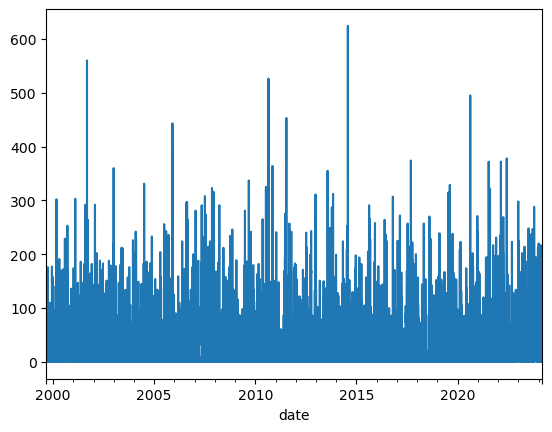

In [8]:
#datapath = os.path.join('../KNMI_regen')
#print(datapath)
knmi_regen=pd.read_csv('../KNMI_regen/neerslaggeg_KOOTWIJK-RADIO_567.txt',sep=',',header=17)
knmi_regen=knmi_regen.iloc[28000:] #remove dataset before ~november 2007
#knmi_regen=knmi_regen.iloc[31000:] #remove dataset before ~november 2007
knmi_regen['date']=pd.to_datetime(knmi_regen['YYYYMMDD'],yearfirst=True,format='%Y%m%d')
knmi_regen.index=knmi_regen['date']
knmi_regen=knmi_regen.rename(columns={"   RD": "RD", "   SX": "SX"}) #for some reason there's spaces in some of the column names, removing them.
knmi_regen=knmi_regen.astype({"RD": np.intc})
knmi_regen['RD'].plot() #Column RD is is rain daily sum, SX is code related to snow. If unnamed contains 4 spaces it's also a code for snow. STN is station ID.
df_rain=knmi_regen.loc[:,['RD']].resample('3H').ffill()
#df_rain

### Run A-gs model

In [9]:
# Run A-gs model
#TODO: DEFINITIVELY REPLACE OLD FILTER WITH NP.WHERE FILTER, I TEMP HOTFIXED IT HERE:
an_final,an_umol,rs, ra = runAgs(df_profile_filter,df_Comb_filter2,df_meteo_filter,df_EC_filter,fstr=1.0)

## Calcuate ET

### Assemble dataframe 'df_ET' that will hold output and fill with inputs

In [10]:
#TODO: UPDATE THIS FUNCTION EVERYWHERE TO ACTUALLY USE FILTERED VALUES!!!!
def init_ETframe(rs_series):
    df_ET = pd.concat([df_meteo_filter['L(o)'],df_meteo_filter['Te-L(o)'],df_profile_filter['Pressure'],df_Comb_filter['VPD'],df_Comb_filter['rH'],df_meteo_filter['P(mast)']],axis=1,sort=False)
    #convert Pressure from hPa to kPa 
    df_ET['p_kPa']=df_ET['Pressure']/10
    df_ET['VPD_adj']=df_ET['VPD'].loc[df_ET['VPD']>0] #some outlier values for VPD are negative, remove from dataset
    df_ET['VPD_adj']=df_ET['VPD_adj']/10  # VPD from df_Comb is in hPa, I need kPa, so hPa/10 = kPa
    df_ET['rs']=rs_series.to_frame(name="rs")
    df_ET['ra']=ra.to_frame(name="ra")
    return df_ET

In [11]:
df_ET=init_ETframe(rs)

In [12]:
df_ET=calc_LE(df_ET)

In [13]:
# Add in precipitation last 3h and 24 hour values so it can be used for filtering
df_ET['last3day_prec']=df_ET['P(mast)'].rolling('72H').sum()

## end of calculate ET

### Manually checking datasets for extreme values

In [ ]:
df_Comb_filter['LE'].plot()

In [ ]:
df_Comb_filter2['LE'].plot()

# fstr analysis

### step 1 assemble dataframe and chop up according to each week

In [14]:
df_tmp30m=pd.DataFrame()
df_tmp30m['ET']=df_ET['ET_VPD']
df_tmp30m['P(mast)']=df_ET['P(mast)']
df_tmp30m=df_tmp30m.dropna()

In [15]:
df_tmp30m=pd.DataFrame()
df_tmp30m['ET']=df_ET['ET_VPD']
df_tmp30m['P(mast)']=df_ET['P(mast)']
df_tmp30m=df_tmp30m.dropna()

df_LE=df_Comb['LE'].loc[df_Comb['LE']>=0]
df_tmp30m=df_tmp30m.merge(df_LE, how='inner',left_index=True, right_index=True)

#df_tmp30['ET/LE']=df_tmp30['ET']/df_tmp30['LE']
#df_tmp30m['LE/ET']=df_tmp30m['LE']/df_tmp30m['ET'] #<- this is the one we want, observations/model. If obs/model = fstr, then model*fstr= model(obs/model) = obs

df_tmp30m['P_3day']=df_tmp30m['P(mast)'].rolling('72H').sum()
#df_tmp30m=df_tmp30m.loc[df_tmp30m['P_3day']==0]

df_tmp3h=df_tmp30m.resample('3H').mean()#.between_time("09:00", "15:00")
df_tmp3h['P(mast)']=df_tmp30m['P(mast)'].resample('3H').sum() #overwrite the averaged pmast with sum pmast
df_tmp3h['P_3day']=df_tmp3h['P(mast)'].rolling('72H').sum() #overwrite the correct P_3day

#remove rainy days through knmi data
df_tmp3h['RD']=df_rain['RD']
df_tmp3h['RD']=df_tmp3h['RD']/10 #convert from tenths of mm to mm
df_tmp3h=df_tmp3h.loc[df_tmp3h['RD']==0]

#remove rainy days through Pmast
df_rain3h_dailymax=df_tmp3h['P(mast)'].resample('1D').sum().resample('3H').ffill()
df_rain3h_dailymax=df_rain3h_dailymax[:-1] #remove last entry because all 3h frames end on 21:00 not 00:00
df_rain3h_dailymax=df_rain3h_dailymax.rename('P(mast)Dmax')
df_tmp3h['P(mast)Dmax']=df_rain3h_dailymax
df_tmp3h=df_tmp3h.loc[df_tmp3h['P(mast)Dmax']==0]

#manual filter remove bad days
listofdates =  ['2008-08-24',
                '2010-05-11',
                '2010-08-04',
                '2012-06-13',
                '2013-05-10',
                '2013-05-19',
                '2014-06-16',
                '2017-04-22']

#for date in listofdates:
#    df_tmp3h.loc[date+' 00:00':date+' 21:00','ET'] = np.nan
#    df_tmp3h.loc[date+' 00:00':date+' 21:00','LE'] = np.nan

#remove hours outside of 9:00 and 15:00
#df_tmp3h=df_tmp3h.between_time("09:00", "15:00")

#resample to daily
df_tmp1d=df_tmp3h.resample('1D').mean()
df_tmp1d['doy']=df_tmp1d.index.dayofyear
df_tmp1d['P(mast)sum']=df_tmp3h['P(mast)'].resample('1D').sum()
df_tmp1d['LE/ET']=df_tmp1d['LE']/df_tmp1d['ET']

#resample to weekly (7 days)
df_tmp7d=df_tmp3h.resample('7D').mean()
df_tmp7d['LE/ET']=df_tmp7d['LE']/df_tmp7d['ET']

### visualize each year to see whats going wrong

## plotting fstr over time for growthseason

### plotting fstr over time for growthseason some years colored

In [ ]:
#plt.rcParams["figure.figsize"] = plt.rcParamsDefault
#plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams["figure.figsize"] = (20,6)

#remove non-growthseason values
df_tmp7d=df_tmp7d.loc[(df_tmp7d.index.month>=4) & (df_tmp7d.index.month<=9)]

df_tmp7d['weeknr']=df_tmp7d.index.isocalendar().week

#df_tmp7d=df_tmp7d.loc[df_tmp7d['LE/ET']<=1.0]

#df_tmp

#df_tmp['ET/LE'].plot(ylim=(0,15))

fig,ax = plt.subplots()
ax.set_ylim(0,2)
ax.set_ylabel('fstr (=LEobs/LEsim)')
ax.set_xlabel('weeknr')

plt.xticks([x for x in range(14,41)]) #this sets the xticks for the main x-axis with the weeknr
locs, labels=plt.xticks() #this same function with no argument gets the position and labels and stores them for later

ax2 = ax.twiny()
fig.subplots_adjust(bottom=0.2)

# Move twinned axis ticks and label from top to bottom
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")

# Offset the twin axis below the host
ax2.spines["bottom"].set_position(("axes", -0.15))

# Turn on the frame for the twin axis, but then hide all 
# but the bottom spine
ax2.set_frame_on(True)
ax2.patch.set_visible(False)

ax2.set_xlabel('approx month')
ax2.set_xlim(13,41)
ax2.set_xticks([14, 18, 22, 26,  30, 34, 39])
ax2.set_xticklabels(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'])

colored_years={'2003':'green','2006':'orange','2007':'magenta','2011':'#b62020','2018':'blue','2019':'cyan'}

for year in ['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2017','2018','2019']:
    start=year+'-01-01 01:00'
    end=year+'-12-23 23:00'
    if year in colored_years.keys():
        color=colored_years[year]
        marker='^'
    else:
        color='grey'
        marker=''
    #marker={'2008':'^','2009':'^','2010':'^','2011':'^','2012':'o','2013':'^','2014':'o','2015':'^','2016':'o','2017':'o','2018':'^'}
    #colors={'2008':'#b62020','2009':'#cb2424','2010':'^','2011':'^','2012':'o','2013':'^','2014':'o','2015':'^','2016':'o','2017':'o','2018':'^'}
    #df_tmp.loc[start:end,'ET/LE'].plot(x=df_tmp.loc[start:end,'weeknr'],ylim=(0,15))
    ax.plot(df_tmp7d.loc[start:end,'weeknr'],df_tmp7d.loc[start:end,'LE/ET'], marker=marker,color=color ,label=year) #marker=marker[year]
ax.legend(loc=("upper left"))
ax.set_title('fstr (=LEobs/LEsim) on week-basis for 2001-2020 growth seasons (Apr-Sept), 3-hour means for 09:00-15:00, rainy days removed')
#ax.set_title('fstr=0: witing point , fstr=1: no water stress')
ax.grid()

### fstr over time all years colored

In [ ]:
#plt.rcParams["figure.figsize"] = plt.rcParamsDefault
#plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams["figure.figsize"] = (20,6)

#remove non-growthseason values
df_tmp7d=df_tmp7d.loc[(df_tmp7d.index.month>=4) & (df_tmp7d.index.month<=9)]

df_tmp7d['weeknr']=df_tmp7d.index.isocalendar().week

#df_tmp7d=df_tmp7d.loc[df_tmp7d['LE/ET']<=1.0]

#df_tmp

#df_tmp['ET/LE'].plot(ylim=(0,15))

fig,ax = plt.subplots()
ax.set_ylim(0,1.5)
ax.set_ylabel('fstr (=LEobs/LEsim)')
ax.set_xlabel('weeknr')

plt.xticks([x for x in range(14,41)]) #this sets the xticks for the main x-axis with the weeknr
locs, labels=plt.xticks() #this same function with no argument gets the position and labels and stores them for later

ax2 = ax.twiny()
fig.subplots_adjust(bottom=0.2)

# Move twinned axis ticks and label from top to bottom
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")

# Offset the twin axis below the host
ax2.spines["bottom"].set_position(("axes", -0.15))

# Turn on the frame for the twin axis, but then hide all 
# but the bottom spine
ax2.set_frame_on(True)
ax2.patch.set_visible(False)

ax2.set_xlabel('approx month')
ax2.set_xlim(13,41)
ax2.set_xticks([14, 18, 22, 26,  30, 34, 39])
ax2.set_xticklabels(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'])


for year in ['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2017','2018','2019']:
    start=year+'-01-01 01:00'
    end=year+'-12-23 23:00'
    if int(year)>=2010:
        marker='s'
    else:
        marker='o'

    ax.plot(df_tmp7d.loc[start:end,'weeknr'],df_tmp7d.loc[start:end,'LE/ET'], marker=marker ,label=year) #marker=marker[year]
ax.legend(loc=("upper left"))
fig.suptitle('fstr (=LEobs/LEsim) on week-basis for april t/m sept, 09:00-15:00, rainy days removed')
ax.set_title('fstr=0: witing point , fstr=1: no water stress')
ax.grid()

### plotting fstr over time some other years colored

In [ ]:
#plt.rcParams["figure.figsize"] = plt.rcParamsDefault
#plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams["figure.figsize"] = (20,6)

#remove non-growthseason values
df_tmp7d=df_tmp7d.loc[(df_tmp7d.index.month>=4) & (df_tmp7d.index.month<=9)]

df_tmp7d['weeknr']=df_tmp7d.index.isocalendar().week

#df_tmp7d=df_tmp7d.loc[df_tmp7d['LE/ET']<=1.0]

#df_tmp

#df_tmp['ET/LE'].plot(ylim=(0,15))

fig,ax = plt.subplots()
ax.set_ylim(0,1.5)
ax.set_ylabel('fstr (=LEobs/LEsim)')
ax.set_xlabel('weeknr')

plt.xticks([x for x in range(14,41)]) #this sets the xticks for the main x-axis with the weeknr
locs, labels=plt.xticks() #this same function with no argument gets the position and labels and stores them for later

ax2 = ax.twiny()
fig.subplots_adjust(bottom=0.2)

# Move twinned axis ticks and label from top to bottom
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")

# Offset the twin axis below the host
ax2.spines["bottom"].set_position(("axes", -0.15))

# Turn on the frame for the twin axis, but then hide all 
# but the bottom spine
ax2.set_frame_on(True)
ax2.patch.set_visible(False)

ax2.set_xlabel('approx month')
ax2.set_xlim(13,41)
ax2.set_xticks([14, 18, 22, 26,  30, 34, 39])
ax2.set_xticklabels(['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'])

colored_years={'2003':'green','2006':'orange','2011':'#b62020','2013':'purple','2018':'blue'}

for year in ['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2017','2018','2019']:
    start=year+'-01-01 01:00'
    end=year+'-12-23 23:00'
    if year in colored_years.keys():
        color=colored_years[year]
        marker='^'
    else:
        color='grey'
        marker=''
    #marker={'2008':'^','2009':'^','2010':'^','2011':'^','2012':'o','2013':'^','2014':'o','2015':'^','2016':'o','2017':'o','2018':'^'}
    #colors={'2008':'#b62020','2009':'#cb2424','2010':'^','2011':'^','2012':'o','2013':'^','2014':'o','2015':'^','2016':'o','2017':'o','2018':'^'}
    #df_tmp.loc[start:end,'ET/LE'].plot(x=df_tmp.loc[start:end,'weeknr'],ylim=(0,15))
    ax.plot(df_tmp7d.loc[start:end,'weeknr'],df_tmp7d.loc[start:end,'LE/ET'], marker=marker,color=color ,label=year) #marker=marker[year]
ax.legend(loc=("upper left"))
fig.suptitle('fstr (=LEobs/LEsim) on week-basis for april t/m sept, 09:00-15:00, rainy days removed')
ax.set_title('fstr=0: witing point , fstr=1: no water stress')
ax.grid()

## end of plotting fstr over time for growthseason

## soil moisture anomaly

In [ ]:
#To calculate anomalies monthly precipitation time series from a monthly precipitation time series, 
#subtract the mean value of each month across all years from the original value of that month in each year

#(value soil moisture in that year)-mean soil moisture across all years

#

## soil moisture

## Groundwater

### import groundwater

In [18]:
#import ground water as sequeltial time series
df_GWS_daily_1 = pd.read_csv('GWS_daily.csv')
df_GWS_daily_1['datetime']=pd.to_datetime(df_GWS_daily_1['datetime'])
df_GWS_daily_1.index=df_GWS_daily_1['datetime']
df_GWS_daily_1.drop(columns=['datetime'],inplace=True) 
df_GWS_daily_1
#columns are datetime (index) depth, depth_anom_all

,depth,depth_anom_all
datetime,,
2001-01-15,109.000000,-82.788726
2001-01-16,108.857143,-82.931583
2001-01-17,108.714286,-83.074440
2001-01-18,108.571429,-83.217298
2001-01-19,108.428571,-83.360155
...,...,...
2019-12-27,249.000000,57.211274
2019-12-28,248.000000,56.211274
2019-12-29,247.000000,55.211274


In [31]:
#import ground water as sequeltial time series
#import ground water sorted by day of year, each year in column
df_GWS_multi = pd.read_csv('GWS_multi_daily.csv')
df_GWS_multi['yeardate']=pd.to_datetime(df_GWS_multi['yeardate'])
df_GWS_multi.index=df_GWS_multi['yeardate']
df_GWS_multi.drop(columns=['Unnamed: 0'],inplace=True) 
df_GWS_multi
#columns: yeardate (index) monthday (note! a str in form of mm-dd)	depth_2001	depth_2001_diff	depth_2001_anom	depth_2002	depth_2002_diff	depth_2002_anom	depth_2003	depth_2003_diff	depth_2003_anom	...	depth_2016_anom	depth_2017	depth_2017_diff	depth_2017_anom	depth_2018	depth_2018_diff	depth_2018_anom	depth_2019	depth_2019_diff	depth_2019_anom

,yeardate,monthday,depth_2001,depth_2001_diff,depth_2001_anom,depth_2002,depth_2002_diff,depth_2002_anom,depth_2003,depth_2003_diff,...,depth_2016_anom,depth_2017,depth_2017_diff,depth_2017_anom,depth_2018,depth_2018_diff,depth_2018_anom,depth_2019,depth_2019_diff,depth_2019_anom
yeardate,,,,,,,,,,,,,,,,,,,,,
2000-04-01,2000-04-01,04-01,93.160000,0.000000,-104.263859,84.133333,0.000000,-113.290525,124.0,0.0,...,-19.423859,205.0,0.0,7.576141,196.0,0.0,-1.423859,213.0,0.0,15.576141
2000-04-02,2000-04-02,04-02,93.613333,0.453333,-103.810525,84.766667,0.633333,-112.657192,123.0,-1.0,...,-20.423859,206.0,1.0,8.576141,195.0,-1.0,-2.423859,213.0,0.0,15.576141
2000-04-03,2000-04-03,04-03,94.066667,0.906667,-103.357192,85.400000,1.266667,-112.023859,124.0,0.0,...,-20.423859,207.0,2.0,9.576141,194.0,-2.0,-3.423859,214.0,1.0,16.576141
2000-04-04,2000-04-04,04-04,94.520000,1.360000,-102.903859,86.033333,1.900000,-111.390525,124.0,0.0,...,-19.423859,207.0,2.0,9.576141,193.0,-3.0,-4.423859,214.0,1.0,16.576141
2000-04-05,2000-04-05,04-05,94.973333,1.813333,-102.450525,86.666667,2.533333,-110.757192,123.0,-1.0,...,-18.423859,207.0,2.0,9.576141,194.0,-2.0,-3.423859,215.0,2.0,17.576141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000-10-26,2000-10-26,10-26,126.142857,32.982857,-71.281002,172.000000,87.866667,-25.423859,213.0,89.0,...,56.576141,266.0,61.0,68.576141,294.0,98.0,96.576141,282.0,69.0,84.576141
2000-10-27,2000-10-27,10-27,126.428571,33.268571,-70.995287,169.000000,84.866667,-28.423859,213.0,89.0,...,56.576141,266.0,61.0,68.576141,293.0,97.0,95.576141,282.0,69.0,84.576141
2000-10-28,2000-10-28,10-28,126.714286,33.554286,-70.709573,169.000000,84.866667,-28.423859,213.0,89.0,...,56.576141,265.0,60.0,67.576141,294.0,98.0,96.576141,281.0,68.0,83.576141


### end of import groundwater

## Plot GWS over time

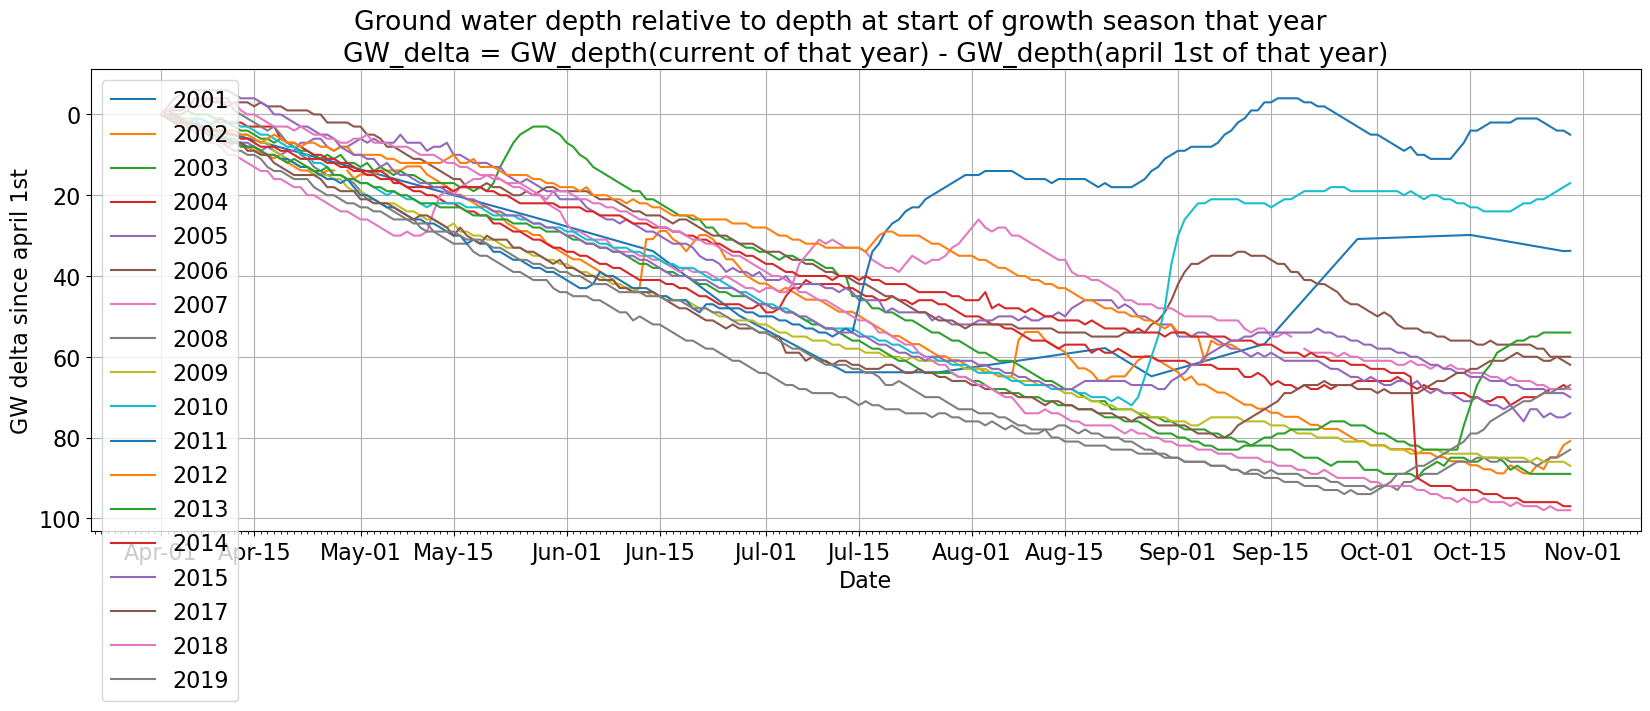

In [35]:
#df_GWS_multi # all years
plt.rcParams.update({'font.size': 16})
#plt.rcParams["figure.figsize"] = plt.rcParamsDefault
#plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams["figure.figsize"] = (20,6)


fig,ax = plt.subplots()
#ax.set_ylim(0,1.5)
ax.set_ylabel('GW delta since april 1st')
ax.set_xlabel('Date')

#plt.xticks([x for x in range(14,41)]) #this sets the xticks for the main x-axis with the weeknr
#locs, labels=plt.xticks() #this same function with no argument gets the position and labels and stores them for later

#fig.subplots_adjust(bottom=0.2)



colored_years={'2003':'green','2006':'orange','2011':'#b62020','2013':'purple','2018':'blue'}

for year in ['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2017','2018','2019']:
    start=year+'-04-01'
    end=year+'-10-30'
    if year in colored_years.keys():
        color=colored_years[year]
        marker=''
    else:
        color='grey'
        marker=''
    ax.plot(df_GWS_multi['yeardate'],df_GWS_multi['depth_'+year+'_diff'], marker=marker ,label=year) 
ax.legend(loc=("upper left"))
ax.invert_yaxis()
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=[1,15]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))

fig.suptitle('Ground water depth relative to depth at start of growth season that year')
ax.set_title('GW_delta = GW_depth(current of that year) - GW_depth(april 1st of that year)')
ax.grid()

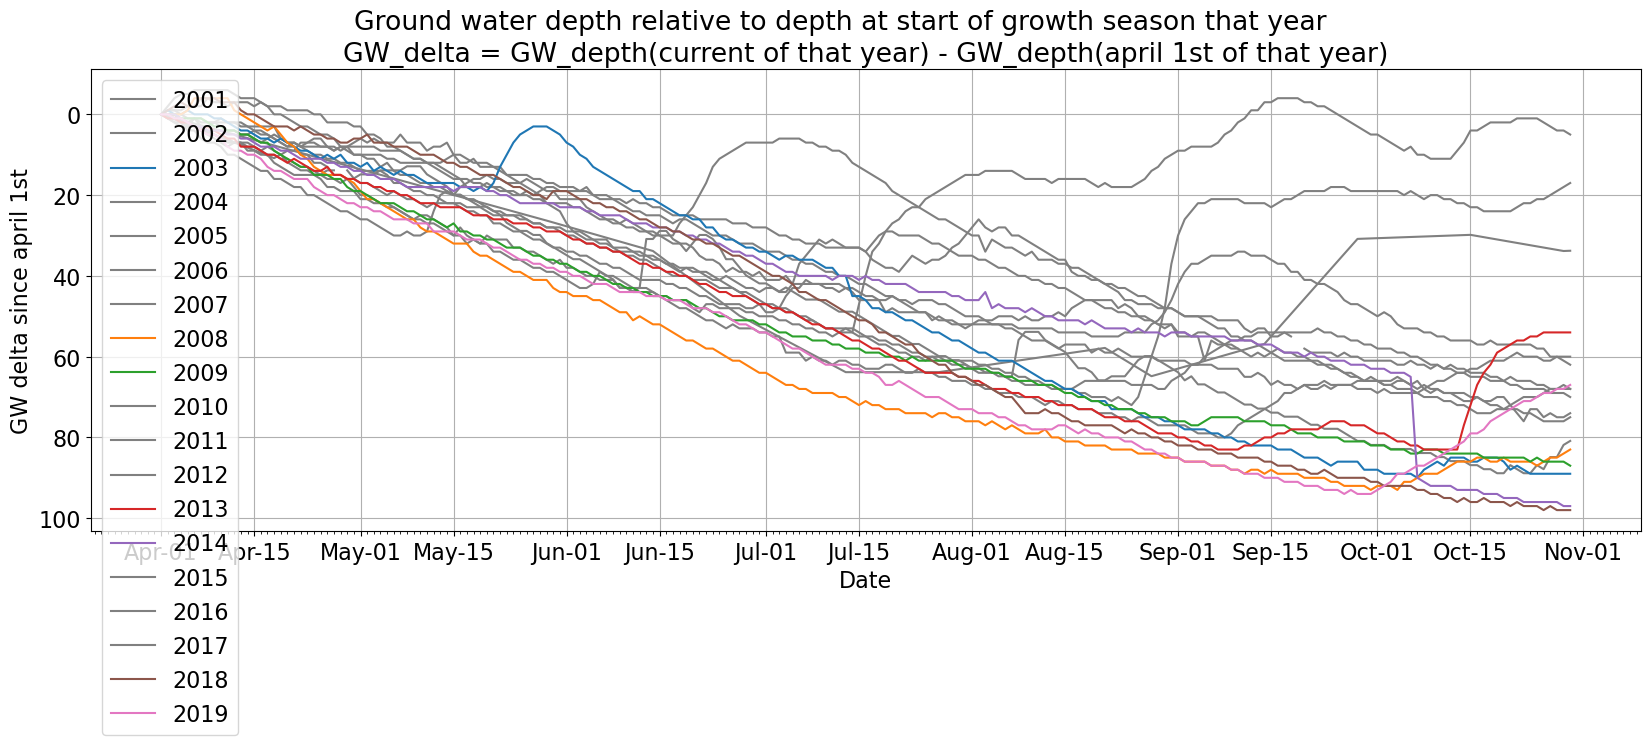

In [36]:
## df_GWS_multi #years that stay down

#plt.rcParams["figure.figsize"] = plt.rcParamsDefault
#plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams["figure.figsize"] = (20,6)

fig,ax = plt.subplots()
#ax.set_ylim(0,1.5)
ax.set_ylabel('GW delta since april 1st')
ax.set_xlabel('Date')

#plt.xticks([x for x in range(14,41)]) #this sets the xticks for the main x-axis with the weeknr
#locs, labels=plt.xticks() #this same function with no argument gets the position and labels and stores them for later

#fig.subplots_adjust(bottom=0.2)

#colored_years={'2003':'green','2008':'orange', 2009'2011':'#b62020','2013':'purple','2018':'blue'}
#2003 2008 2009 2010 (2011) 2013 2014  2018 2019

grey_years=['2001','2002','2004','2005','2006','2007','2010','2011','2012','2015','2016','2017']

#
for year in ['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']:
    start=year+'-04-01'
    end=year+'-10-30'
    if year in grey_years:#colored_years.keys():
        marker=''
        ax.plot(df_GWS_multi['yeardate'],df_GWS_multi['depth_'+year+'_diff'], marker=marker, color='grey' ,label='')
    else:
        marker=''
        ax.plot(df_GWS_multi['yeardate'],df_GWS_multi['depth_'+year+'_diff'], marker=marker, zorder=3 ,label=year)
ax.legend(loc=("upper left"))
ax.invert_yaxis()
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=[1,15]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))

fig.suptitle('Ground water depth relative to depth at start of growth season that year')
ax.set_title('GW_delta = GW_depth(current of that year) - GW_depth(april 1st of that year)')
ax.grid()

## End of Plot GWS over time

## Plotting fstr sensitivity analyses

NameError: name 'df_GWS_multi' is not defined

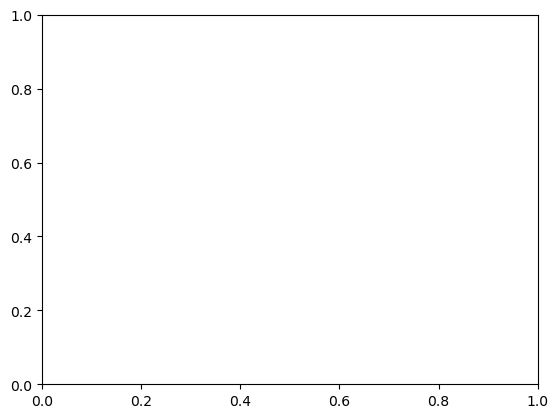

In [22]:
plt.rcParams["figure.figsize"] = (6.4, 4.8)

#parallel processing

#df_GWS_multi7d=df_GWS_multi.iloc[:,2:].resample('7D').mean()

df_1d=pd.DataFrame()

df_1d=df_tmp3h.resample('1D').mean()

#df_1d=df_tmp30m.resample('1D').mean()
#df_1d['P(mast)']=df_tmp30m['P(mast)'].resample('1D').sum() #precip needs to be sum, not mean.

df_1d=df_1d.loc[df_1d['P(mast)']==0.0]
df_1d=df_1d.loc[df_1d['RD']==0.0] #knmi rain data

df_1d['LE/ET']=df_1d['LE']/df_1d['ET']
df_1d=df_1d.loc[df_1d['LE/ET']<1.2]

#df_1d=df_1d.merge(df_GWS_multi['GWS_2003_diff'], how='inner',left_index=True, right_index=True)
#df_1d=df_1d.merge(dfGWS['anom'], how='inner',left_index=True, right_index=True)

fig, ax = plt.subplots()

for year in range(2001,2020):
    
    
    st=str(year)+"-04-01"
    ed=str(year)+"-09-30"
    st2="2000-04-01" #due to df_GWS_multi being indexed to the year 2000, we need extra set of st and ed
    ed2="2000-09-30"
    GWS_key='depth_'+str(year)+'_diff' #the column name to ask for
    df_tmp=pd.DataFrame()
    df_tmp[GWS_key]=df_GWS_multi.loc[st2:ed2,[GWS_key]]
    df_tmp['rel_date'] = df_tmp.index.strftime(date_format=str(year)+'-%m-%d')
    df_tmp['rel_date'] = pd.to_datetime(df_tmp['rel_date'],format='%Y-%m-%d')
    df_tmp.index=df_tmp['rel_date']
    #print(df_tmp.index)

    df_tmp=df_tmp.merge(df_1d.loc[st:ed,['LE/ET']], how='inner',left_index=True, right_index=True)
    ax.scatter(df_tmp[GWS_key],df_tmp['LE/ET'],color='b',s=5)
    ax.set_xlabel('GW delta')
    ax.set_ylabel('fstr')
    #ax.set_xlim(-5,90)
    #ax.set_ylim(0,1.2)
    ax.set_title('fstr over groundwater level change since april, \n ')

    #plt.show()

#df_GWS_multi7d

C:\Users\feder\AppData\Local\Temp\ipykernel_34960\1462211292.py:38: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df_1d_seq = pd.concat([df_1d_seq,df_tmp],axis='index') #vertical join, along index


R2:  0.0065874663279054035
slope, intercept: 0.0005938953911345655 0.5680829302617149


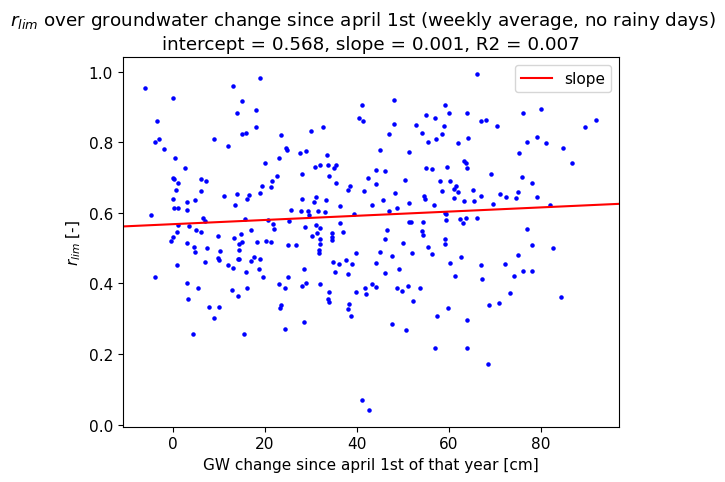

In [50]:
plt.rcParams["figure.figsize"] = (6.4, 4.8)
plt.rcParams.update({'font.size': 11})
#sequential processing of GWS diff
#df_GWS_multi7d=df_GWS_multi.iloc[:,2:].resample('7D').mean()

df_1d=pd.DataFrame()

df_1d=df_tmp3h.resample('1D').mean()

#df_1d=df_tmp30m.resample('1D').mean()
#df_1d['P(mast)']=df_tmp30m['P(mast)'].resample('1D').sum() #precip needs to be sum, not mean.

df_1d=df_1d.loc[df_1d['P(mast)']==0.0]
df_1d=df_1d.loc[df_1d['RD']==0.0] #knmi rain data

df_1d['LE/ET']=df_1d['LE']/df_1d['ET']
df_1d=df_1d.loc[df_1d['LE/ET']<1.0]


df_1d_seq=pd.DataFrame() #sequential dataframe

for year in range(2001,2020):
    
    st=str(year)+"-04-01"
    ed=str(year)+"-09-30"
    st2="2000-04-01" #due to df_GWS_multi being indexed to the year 2000, we need extra set of st and ed
    ed2="2000-09-30"
    GWS_key='depth_'+str(year)+'_diff' #the column name to ask for
    df_tmp=pd.DataFrame()
    df_tmp[GWS_key]=df_GWS_multi.loc[st2:ed2,[GWS_key]]
    df_tmp['rel_date'] = df_tmp.index.strftime(date_format=str(year)+'-%m-%d')
    df_tmp['rel_date'] = pd.to_datetime(df_tmp['rel_date'],format='%Y-%m-%d')
    df_tmp.index=df_tmp['rel_date']
    df_tmp=df_tmp.merge(df_1d.loc[st:ed,['LE/ET']], how='inner',left_index=True, right_index=True)
    #after this merge is done we can rename the GWS column
    df_tmp.rename(columns={GWS_key:'GWS_diff'},inplace=True)
    #print(df_tmp.columns)
    df_1d_seq = pd.concat([df_1d_seq,df_tmp],axis='index') #vertical join, along index
    df_1d_seq = df_1d_seq.dropna() #remove entries where there are at least one nan

df_1d_seq=df_1d_seq.resample('7D').mean()
df_1d_seq=df_1d_seq.dropna()

fig, ax = plt.subplots()
ax.scatter(df_1d_seq['GWS_diff'],df_1d_seq['LE/ET'],color='b',s=5)

slope, intercept, r_value, p_value, std_err = stats.linregress(df_1d_seq['GWS_diff'],df_1d_seq['LE/ET'])  #linregres x, y . note r_value is Pearson's coefficient. R^2 is r_value**2
print('R2: ',r_value**2)
print('slope, intercept:', slope, intercept)
ax.axline((0.0,intercept),slope=slope,c='r',label='slope')
#ax.axline ((0.0,0.0), slope=1, c='r',linestyle='dashed',label='1:1')

ax.set_xlabel('GW change since april 1st of that year [cm]')
ax.set_ylabel(r'$r_{lim}$ [-]')
#ax.set_xlim(-5,90)
#ax.set_ylim(0,1.2)
fig.suptitle(r'$r_{lim}$ over groundwater change since april 1st (weekly average, no rainy days)')
ax.set_title('intercept = {:.3f}, slope = {:.3f}, R2 = {:.3f}'.format(intercept,slope,r_value**2))
ax.legend(loc='upper right')

plt.show()
#df_1d_seq.head(50)


    
#df_GWS_multi7d

R2:  0.07172499553636331
slope, intercept: -0.01908426716844011 0.7227191442272757


C:\Users\feder\AppData\Local\Temp\ipykernel_34960\385638615.py:66: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df_1d_seq = pd.concat([df_1d_seq,df_tmp],axis='index') #vertical join, along index


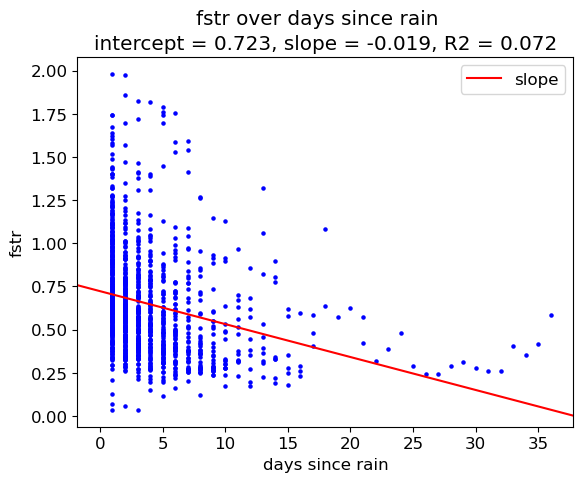

In [39]:
plt.rcParams["figure.figsize"] = (6.4, 4.8)

#sequential processing of days since rain
#df_GWS_multi7d=df_GWS_multi.iloc[:,2:].resample('7D').mean()

df_1d=pd.DataFrame()

df_1d=df_tmp3h.resample('1D').mean()

#df_1d=df_tmp30m.resample('1D').mean()
#df_1d['P(mast)']=df_tmp30m['P(mast)'].resample('1D').sum() #precip needs to be sum, not mean.

###days since rain counting
df_1d['index_shift'] = df_1d.index.shift()
df_1d['timestep']=df_1d['index_shift']-df_1d.index
df_1d['is_1d']=df_1d['timestep']==pd.Timedelta(days=1)
df_1d['days_since_rain']=np.nan #init the new column for assignment

counter=0
for index, row in df_1d.iterrows():
    if row['P(mast)']!=0.0: #if rain isnt zero, reset counting to 0
        counter=0
        df_1d.loc[index,'days_since_rain']=counter
    else: #rain is zero, keep counting up
        if row['is_1d']: #if true, then timedelta is 1 and you keep going, otherwise there's a gap in data and rest to 0
            counter=counter+1
            df_1d.loc[index,'days_since_rain']=counter
            #if index.strftime(date_format='%m-%d')=='04-01': #if it's april first, reset counter
            #    counter=0
            #    df_1d.loc[index,'days_since_rain']=counter
            #else: #otherwise count up
                        
        else: #there is a gap in the data, previous entry not one day before, reset counter to 0
            counter=0
            df_1d.loc[index,'days_since_rain']=counter
            
###days since rain counting end


#filter out rainy days
df_1d=df_1d.loc[df_1d['P(mast)']==0.0]
df_1d=df_1d.loc[df_1d['RD']==0.0] #knmi rain data

df_1d['LE/ET']=df_1d['LE']/df_1d['ET']
df_1d=df_1d.loc[df_1d['LE/ET']<2.0]

df_1d_seq=pd.DataFrame() #sequential dataframe

for year in range(2001,2020):
    
    st=str(year)+"-04-01"
    ed=str(year)+"-09-30"
    st2="2000-04-01" #due to df_GWS_multi being indexed to the year 2000, we need extra set of st and ed
    ed2="2000-09-30"
    GWS_key='depth_'+str(year)+'_diff' #the column name to ask for
    df_tmp=pd.DataFrame()
    df_tmp[GWS_key]=df_GWS_multi.loc[st2:ed2,[GWS_key]]
    df_tmp['rel_date'] = df_tmp.index.strftime(date_format=str(year)+'-%m-%d')
    df_tmp['rel_date'] = pd.to_datetime(df_tmp['rel_date'],format='%Y-%m-%d')
    df_tmp.index=df_tmp['rel_date']
    df_tmp=df_tmp.merge(df_1d.loc[st:ed,['LE/ET','days_since_rain','timestep']], how='inner',left_index=True, right_index=True)
    #print(df_tmp)
    #after this merge is done we can rename the GWS column
    df_tmp.rename(columns={GWS_key:'GWS_diff'},inplace=True)
    #print(df_tmp.columns)
    df_1d_seq = pd.concat([df_1d_seq,df_tmp],axis='index') #vertical join, along index
    df_1d_seq = df_1d_seq.dropna() #remove entries where there are at least one nan

fig, ax = plt.subplots()
ax.scatter(df_1d_seq['days_since_rain'],df_1d_seq['LE/ET'],color='b',s=5)

slope, intercept, r_value, p_value, std_err = stats.linregress(df_1d_seq['days_since_rain'],df_1d_seq['LE/ET'])  #linregres x, y . note r_value is Pearson's coefficient. R^2 is r_value**2
print('R2: ',r_value**2)
print('slope, intercept:', slope, intercept)
ax.axline((0.0,intercept),slope=slope,c='r',label='slope')
#ax.axline ((0.0,0.0), slope=-1, c='r',linestyle='dashed',label='1:-1')

ax.set_xlabel('days since rain')
ax.set_ylabel('fstr')
#ax.set_xlim(-5,90)
#ax.set_ylim(0,1.2)
fig.suptitle('fstr over days since rain')
ax.set_title('intercept = {:.3f}, slope = {:.3f}, R2 = {:.3f}'.format(intercept,slope,r_value**2))
ax.legend(loc='upper right')

#plt.show()


#df_1d.head(50)

#df_GWS_multi7d

In [24]:
import seaborn as sns

C:\Users\feder\AppData\Local\Temp\ipykernel_34960\372685581.py:66: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df_1d_seq = pd.concat([df_1d_seq,df_tmp],axis='index') #vertical join, along index
C:\Users\feder\AppData\Local\Temp\ipykernel_34960\372685581.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


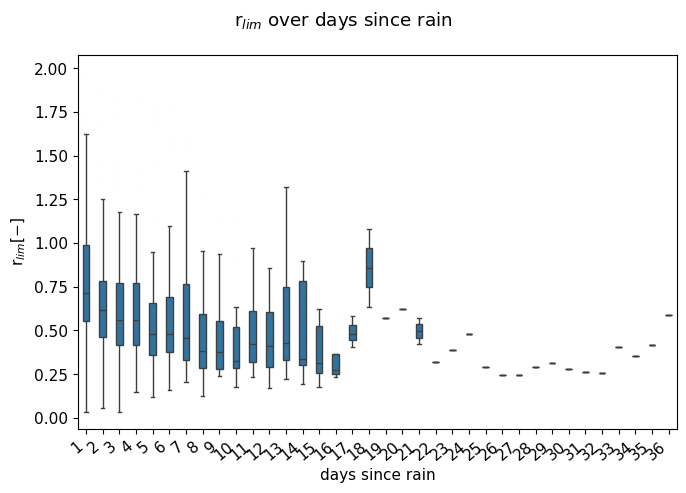

,GWS_diff,rel_date,LE/ET,days_since_rain,timestep,d_since_int
2001-06-21,42.455385,2001-06-21,0.507483,1.0,1 days,1
2001-06-22,43.686154,2001-06-22,1.250834,2.0,1 days,2
2001-06-24,46.147692,2001-06-24,0.507348,1.0,1 days,1
2001-06-25,47.378462,2001-06-25,0.349588,2.0,1 days,2
2001-06-26,48.609231,2001-06-26,0.353997,3.0,1 days,3


In [60]:
plt.rcParams["figure.figsize"] = (7, 5)

#sequential processing of days since rain
#df_GWS_multi7d=df_GWS_multi.iloc[:,2:].resample('7D').mean()

df_1d=pd.DataFrame()

df_1d=df_tmp3h.resample('1D').mean()

#df_1d=df_tmp30m.resample('1D').mean()
#df_1d['P(mast)']=df_tmp30m['P(mast)'].resample('1D').sum() #precip needs to be sum, not mean.

###days since rain counting
df_1d['index_shift'] = df_1d.index.shift()
df_1d['timestep']=df_1d['index_shift']-df_1d.index
df_1d['is_1d']=df_1d['timestep']==pd.Timedelta(days=1)
df_1d['days_since_rain']=np.nan #init the new column for assignment

counter=0
for index, row in df_1d.iterrows():
    if row['P(mast)']!=0.0: #if rain isnt zero, reset counting to 0
        counter=0
        df_1d.loc[index,'days_since_rain']=counter
    else: #rain is zero, keep counting up
        if row['is_1d']: #if true, then timedelta is 1 and you keep going, otherwise there's a gap in data and rest to 0
            counter=counter+1
            df_1d.loc[index,'days_since_rain']=counter
            #if index.strftime(date_format='%m-%d')=='04-01': #if it's april first, reset counter
            #    counter=0
            #    df_1d.loc[index,'days_since_rain']=counter
            #else: #otherwise count up
                        
        else: #there is a gap in the data, previous entry not one day before, reset counter to 0
            counter=0
            df_1d.loc[index,'days_since_rain']=counter
            
###days since rain counting end


#filter out rainy days
df_1d=df_1d.loc[df_1d['P(mast)']==0.0]
df_1d=df_1d.loc[df_1d['RD']==0.0] #knmi rain data

df_1d['LE/ET']=df_1d['LE']/df_1d['ET']
df_1d=df_1d.loc[df_1d['LE/ET']<2.0]

df_1d_seq=pd.DataFrame() #sequential dataframe

for year in range(2001,2020):
    
    st=str(year)+"-04-01"
    ed=str(year)+"-09-30"
    st2="2000-04-01" #due to df_GWS_multi being indexed to the year 2000, we need extra set of st and ed
    ed2="2000-09-30"
    GWS_key='depth_'+str(year)+'_diff' #the column name to ask for
    df_tmp=pd.DataFrame()
    df_tmp[GWS_key]=df_GWS_multi.loc[st2:ed2,[GWS_key]]
    df_tmp['rel_date'] = df_tmp.index.strftime(date_format=str(year)+'-%m-%d')
    df_tmp['rel_date'] = pd.to_datetime(df_tmp['rel_date'],format='%Y-%m-%d')
    df_tmp.index=df_tmp['rel_date']
    df_tmp=df_tmp.merge(df_1d.loc[st:ed,['LE/ET','days_since_rain','timestep']], how='inner',left_index=True, right_index=True)
    #print(df_tmp)
    #after this merge is done we can rename the GWS column
    df_tmp.rename(columns={GWS_key:'GWS_diff'},inplace=True)
    #print(df_tmp.columns)
    df_1d_seq = pd.concat([df_1d_seq,df_tmp],axis='index') #vertical join, along index
    df_1d_seq = df_1d_seq.dropna() #remove entries where there are at least one nan

fig, ax = plt.subplots()

df_1d_seq['d_since_int']=df_1d_seq['days_since_rain'].astype(int)

###
#ax.scatter(df_1d_seq['days_since_rain'],df_1d_seq['LE/ET'],color='b',s=5)

sns.boxplot(data=df_1d_seq, x='d_since_int', y='LE/ET', ax=ax, gap=0.5, fliersize=0.01 )

#sns.plot(data=df_1d_seq,ax=ax)

ax.set_xlabel('days since rain')
ax.set_ylabel(r'r$_{lim} [-]$')
#ax.set_xlim(-5,90)
#ax.set_xlim(-1,22.5)
fig.suptitle(r'r$_{lim}$ over days since rain')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
fig.tight_layout()

plt.show()


df_1d_seq.head(5)

#df_GWS_multi7d

In [ ]:
#proof of concept snippet SHIFTING
e=df_tmp30m.loc['2003-01-01':'2003-01-15',['P(mast)']]
e=e.resample('3H').sum()
#e['event']=e.any(e['P(mast)']!=0.0)

e['time_since']=np.nan
counter=0
#e['P(mast)_shift']=e['P(mast)'].shift() #no need for this
e['index_shift']=e.index.shift()
e['timestep']=e['index_shift']-e.index
e['is_30m']=e['timestep']==pd.Timedelta(hours=3)

for index, row in e.iterrows():
    if row['P(mast)']!=0.0: #if rain isnt zero, reset counting to 0
        counter=0
        e.loc[index,'time_since']=counter
    else: #rain is zero, keep counting up
        counter=counter+1
        e.loc[index,'time_since']=counter

e.head(10)

In [ ]:
#proof of concept snippet
e=df_tmp30m.loc['2003-01-01':'2003-01-15',['P(mast)']]
e=e.resample('3H').sum()
#e['event']=e.any(e['P(mast)']!=0.0)

e['time_since']=np.nan
counter=0

for index, row in e.iterrows():
    if row['P(mast)']==0.0:
        counter=counter+1
        e.loc[index,'time_since']=counter
    else:
        counter=0
        e.loc[index,'time_since']=counter

#e.head(40)

In [ ]:
#df_since=
df_tmp3h

In [ ]:
df_tmp=pd.DataFrame()
df_tmp=df_GWS_multi.loc["2000-04-01":"2000-09-30",['depth_'+str(2002)+'_diff']]
df_tmp['str_date'] = df_tmp.index.strftime(date_format=str(2002)+'-%m-%d')
df_tmp.index=df_tmp['str_date']
df_tmp

In [ ]:
#old method
#new location put 88
dir = '../Dinoloket_2024-01-20/Grondwaterstanden_Put/B32F0088001_1_edit.csv'
df_GWS=pd.read_csv(dir,sep=",",index_col=False)
df_GWS=df_GWS.drop(['Locatie','Filternummer','Bijzonderheid','Opmerking'], axis=1)
#df_GWS['Peildatum']=df_GWS['Peildatum']+" 12:00"
df_GWS['datetime']=pd.to_datetime(df_GWS['Peildatum'], dayfirst=True, format='mixed')
df_GWS.index = df_GWS['datetime']
df_GWS=df_GWS.drop(['Peildatum','datetime'], axis=1)
st="2001-01-01"
ed="2019-12-30"
df_GWS=df_GWS.loc[st:ed]
avg_GWS = df_GWS['Stand (cm t.o.v. MV)'].mean()
df_GWS['anom'] = df_GWS.loc[st:ed,'Stand (cm t.o.v. MV)']-avg_GWS

df_GWS_7d=df_GWS.resample('7D').interpolate()
avg_GWS_7d = df_GWS_7d['Stand (cm t.o.v. MV)'].mean()
df_GWS_7d['anom']=df_GWS_7d.loc[st:ed,'Stand (cm t.o.v. MV)']-avg_GWS_7d
df_GWS_7d.index=df_GWS_7d.index.astype('datetime64[s]')

In [ ]:
#old plot
df_tmp30m=pd.DataFrame()
df_tmp30m['ET']=df_ET['ET_VPD']
df_tmp30m=df_tmp30m.dropna()

df_LE=df_Comb['LE'].loc[df_Comb['LE']>=0]
df_tmp30m=df_tmp30m.merge(df_LE, how='inner',left_index=True, right_index=True)
df_1d=df_tmp30m.resample('1D').sum()

df_1d['LE/ET']=df_1d['LE']/df_1d['ET']
df_1d=df_1d.loc[df_1d['LE/ET']<1.0]

fig,ax = plt.subplots()

st="2011-04-01"
ed="2011-09-30"


df_1d=df_1d.merge(df_GWS['anom'], how='inner',left_index=True, right_index=True)
#df_1d=df_1d.merge(dfGWS['anom'], how='inner',left_index=True, right_index=True)

ax.scatter(df_1d['anom'],df_1d['LE/ET'])

In [ ]:
#plt.rcParams["figure.figsize"] = plt.rcParamsDefault
#plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams["figure.figsize"] = (6,6)

#df_tmp7d_1=df_tmp7d.copy()
#df_tmp1d_1=df_tmp1d_1.loc[df_tmp1d_1['LE/ET']<1.0]

fig,ax = plt.subplots()

#st="2011-04-01"
#ed="2011-09-30"

#df_GWS_7d['Stand (cm t.o.v. MV)']
df_tmp7d_1=pd.merge_asof(df_tmp7d,df_GWS_7d['anom'],left_index=True, right_index=True,direction='backward')
#df_1d=df_1d.merge(dfGWS['anom'], how='inner',left_index=True, right_index=True)

ax.scatter(df_tmp7d_1['anom'],df_tmp7d_1['LE/ET'])

ax.set_ylim(0,1)
ax.set_title('weekly average fstr (only 9:00-15:00, no rainy days) over groundwater anomaly')
#fstr over groundwater change since april 1st (weekly average)'
ax.set_ylabel('fstr 7day mean')
ax.set_xlabel('groundwater anomaly (cm) (positive value means deeper)')

import scipy.stats as stats

df_tmp7d_1=df_tmp7d_1.dropna()

slope, intercept, r_value, p_value, std_err = stats.linregress(df_tmp7d_1['anom'], df_tmp7d_1['LE/ET']) #linregres x, y . note r_value is Pearson's coefficient. R^2 is r_value**2
print('R2: ',r_value**2)
print('slope, intercept:', slope, intercept)
ax.axline((0.0,intercept),slope=slope,c='r',label='slope')
#ax.axline ((0.0,0.0), slope=1, c='r',linestyle='dashed',label='1:1')

In [ ]:
#plt.rcParams["figure.figsize"] = plt.rcParamsDefault
#plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams["figure.figsize"] = (6,6)

#df_tmp7d_1=df_tmp7d.copy()
#df_tmp1d_1=df_tmp1d_1.loc[df_tmp1d_1['LE/ET']<1.0]

fig,ax = plt.subplots()

#st="2011-04-01"
#ed="2011-09-30"

#df_GWS_7d['Stand (cm t.o.v. MV)']
df_tmp7d_1=pd.merge_asof(df_tmp7d,df_GWS_7d['Stand (cm t.o.v. MV)'],left_index=True, right_index=True,direction='backward')
#df_1d=df_1d.merge(dfGWS['anom'], how='inner',left_index=True, right_index=True)

ax.scatter(df_tmp7d_1['Stand (cm t.o.v. MV)'],df_tmp7d_1['LE/ET'])

ax.set_ylim(0,1)
ax.set_title('7-day average fstr (only 9:00-15:00, no rainy days) over groundwater depth')
ax.set_ylabel('fstr 7day mean')
ax.set_xlabel('groundwater depth (cm) (positive value means deeper)')

import scipy.stats as stats

slope, intercept, r_value, p_value, std_err = stats.linregress(df_tmp7d_1['Stand (cm t.o.v. MV)'], df_tmp7d_1['LE/ET']) #linregres x, y . note r_value is Pearson's coefficient. R^2 is r_value**2
print('R2: ',r_value**2)
print('slope, intercept:', slope, intercept)
ax.axline((0.0,intercept),slope=slope,c='r',label='slope')
#ax.axline ((0.0,0.0), slope=1, c='r',linestyle='dashed',label='1:1')

In [ ]:
#plt.rcParams["figure.figsize"] = plt.rcParamsDefault
#plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams["figure.figsize"] = (6,6)

#df_tmp7d_1=df_tmp7d.copy()
#df_tmp1d_1=df_tmp1d_1.loc[df_tmp1d_1['LE/ET']<1.0]

fig,ax = plt.subplots()

#st="2011-04-01"
#ed="2011-09-30"

#df_GWS_7d['Stand (cm t.o.v. MV)']
#df_tmp7d_1=pd.merge_asof(df_tmp7d,df_GWS_7d['Stand (cm t.o.v. MV)'],left_index=True, right_index=True,direction='backward')


df_tmp7d_1=df_tmp7d.merge(df_soil_7d['SM-003'], how='inner',left_index=True, right_index=True)

ax.scatter(df_tmp7d_1['SM-003'],df_tmp7d_1['LE/ET'])

ax.set_ylim(0,1.2)
ax.set_title('7-day average fstr (only 9:00-15:00, no rainy days) over Soil moisture (at 3cm)')
ax.set_ylabel('fstr 7day mean')
ax.set_xlabel('soil moisture at 3cm depth (% volume)')

import scipy.stats as stats

df_tmp_7d_1=df_tmp_7d_1.dropna()
slope, intercept, r_value, p_value, std_err = stats.linregress(df_tmp7d_1['SM-003'], df_tmp7d_1['LE/ET']) #linregres x, y . note r_value is Pearson's coefficient. R^2 is r_value**2
print('R2: ',r_value**2)
print('slope, intercept:', slope, intercept)
ax.axline((0.0,intercept),slope=slope,c='r',label='slope')
#ax.axline ((0.0,0.0), slope=1, c='r',linestyle='dashed',label='1:1')

In [ ]:
#plt.rcParams["figure.figsize"] = plt.rcParamsDefault
#plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams["figure.figsize"] = (6,6)

#df_tmp7d_1=df_tmp7d.copy()
#df_tmp1d_1=df_tmp1d_1.loc[df_tmp1d_1['LE/ET']<1.0]

fig,ax = plt.subplots()

#st="2011-04-01"
#ed="2011-09-30"

#df_GWS_7d['Stand (cm t.o.v. MV)']
#df_tmp7d_1=pd.merge_asof(df_tmp7d,df_GWS_7d['Stand (cm t.o.v. MV)'],left_index=True, right_index=True,direction='backward')


df_tmp7d_1=df_tmp7d.merge(df_soil_7d['SM-Lit'], how='inner',left_index=True, right_index=True)

ax.scatter(df_tmp7d_1['SM-Lit'],df_tmp7d_1['LE/ET'])

ax.set_ylim(0,1.2)
ax.set_title('7-day average fstr (only 9:00-15:00, no rainy days) over Soil moisture (Litter)')
ax.set_ylabel('fstr 7day mean')
ax.set_xlabel('soil moisture at Litter (% volume)')

import scipy.stats as stats

slope, intercept, r_value, p_value, std_err = stats.linregress(df_tmp7d_1['SM-Lit'], df_tmp7d_1['LE/ET']) #linregres x, y . note r_value is Pearson's coefficient. R^2 is r_value**2
print('R2: ',r_value**2)
print('slope, intercept:', slope, intercept)
ax.axline((0.0,intercept),slope=slope,c='r',label='slope')
#ax.axline ((0.0,0.0), slope=1, c='r',linestyle='dashed',label='1:1')

In [ ]:
df_soil_7d_sm3_mean=df_soil_7d['SM-003'].mean()
df_soil_7d_lit_mean=df_soil_7d['SM-Lit'].mean()
df_soil_7d['SM-003_anom']=df_soil_7d['SM-003']-df_soil_7d_sm3_mean
df_soil_7d['SM-Lit_anom']=df_soil_7d['SM-Lit']-df_soil_7d_lit_mean

In [ ]:
#plt.rcParams["figure.figsize"] = plt.rcParamsDefault
#plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams["figure.figsize"] = (6,6)

#df_tmp7d_1=df_tmp7d.copy()
#df_tmp1d_1=df_tmp1d_1.loc[df_tmp1d_1['LE/ET']<1.0]

fig,ax = plt.subplots()

#st="2011-04-01"
#ed="2011-09-30"

#df_GWS_7d['Stand (cm t.o.v. MV)']
#df_tmp7d_1=pd.merge_asof(df_tmp7d,df_GWS_7d['Stand (cm t.o.v. MV)'],left_index=True, right_index=True,direction='backward')


df_tmp7d_1=df_tmp7d.merge(df_soil_7d['SM-003_anom'], how='inner',left_index=True, right_index=True)

ax.scatter(df_tmp7d_1['SM-003_anom'],df_tmp7d_1['LE/ET'])

ax.set_ylim(0,1.2)
ax.set_title('7-day average fstr (only 9:00-15:00, no rainy days) over Soil moisture Anomaly (3cm depth)')
ax.set_ylabel('fstr 7day mean')
ax.set_xlabel('soil moisture anomaly at 3cm depth (% volume)')

import scipy.stats as stats

df_tmp7d_1=df_tmp7d_1.dropna()
slope, intercept, r_value, p_value, std_err = stats.linregress(df_tmp7d_1['SM-003_anom'], df_tmp7d_1['LE/ET']) #linregres x, y . note r_value is Pearson's coefficient. R^2 is r_value**2
print('R2: ',r_value**2)
print('slope, intercept:', slope, intercept)
ax.axline((0.0,intercept),slope=slope,c='r',label='slope')
#ax.axline ((0.0,0.0), slope=1, c='r',linestyle='dashed',label='1:1')

In [74]:
### HEREEEE
SM= pd.read_csv('Soil_moisture.csv')
SM['datetime']=pd.to_datetime(SM['datetime'])
SM.index=SM['datetime']
SM.drop(columns='datetime',inplace=True)
#SM has columns SM-003	SM-020	SM-050	SM-100	'SM_l1' (i.e. 0-50cm)	'SM_l2' (i.e. 50-100)
#and runs from 2005-04-11 00:00:00 2020-12-31 23:30:00 and freq 30 min
#SM=SM.resample('7D').mean()
SM

,SM-003,SM-020,SM-050,SM-100,SM_l1,SM_l2
datetime,,,,,,
2005-04-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-11 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-11 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-11 01:30:00,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-11 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-12-31 21:30:00,0.07,0.064,0.07,0.055,0.068,0.0625
2020-12-31 22:00:00,0.07,0.064,0.07,0.055,0.068,0.0625
2020-12-31 22:30:00,0.07,0.064,0.07,0.055,0.068,0.0625


In [62]:
df_tmp7d

,ET,P(mast),LE,P_3day,RD,P(mast)Dmax,LE/ET
2001-06-21,158.995876,0.0,73.809894,0.000000,0.0,0.0,0.464225
2001-06-28,176.447251,0.0,83.928680,3.250000,0.0,0.0,0.475659
2001-07-05,256.707278,0.0,77.090107,0.000000,0.0,0.0,0.300304
2001-07-12,94.968722,0.0,81.888038,3.650000,0.0,0.0,0.862263
2001-07-19,173.102833,0.0,126.001944,0.000000,0.0,0.0,0.727902
...,...,...,...,...,...,...,...
2019-06-27,195.112909,0.0,74.405372,0.000000,0.0,0.0,0.381345
2019-07-04,169.614435,0.0,69.717692,0.158333,0.0,0.0,0.411036
2019-07-11,85.394029,0.0,59.214644,0.031250,0.0,0.0,0.693428
2019-07-18,200.860627,0.0,80.060107,0.137500,0.0,0.0,0.398585


In [78]:
df_tmp1dc_day

,Obs_LE,Sim_LE,fstr,P_dailysum,doy
date,,,,,
2001-01-01,NaN,NaN,NaN,5.4,1
2001-01-02,NaN,NaN,NaN,5.3,2
2001-01-03,NaN,NaN,NaN,4.7,3
2001-01-04,NaN,NaN,NaN,5.5,4
2001-01-05,NaN,NaN,NaN,8.6,5
...,...,...,...,...,...
2020-12-27,NaN,NaN,NaN,7.6,362
2020-12-28,NaN,NaN,NaN,4.5,363
2020-12-29,NaN,NaN,NaN,2.4,364


In [81]:
#SM_1=SM.reset_index()
#df_tmp7d_1=df_tmp7d.reset_index()
#SM_1 = pd.concat([SM,df_tmp7d_1],axis=1)
SM_1 = SM.resample('D').mean()

SM_1 = pd.concat([SM_1,df_tmp1dc_day],axis=1)
#SM_1=SM_1.loc[:,['SM_l1','SM_l2','fstr',P]]
SM_1

,SM-003,SM-020,SM-050,SM-100,SM_l1,SM_l2,Obs_LE,Sim_LE,fstr,P_dailysum,doy
2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.4,1
2001-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.3,2
2001-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.7,3
2001-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.5,4
2001-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.6,5
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,0.072646,0.065979,0.072521,0.058208,0.070382,0.065365,NaN,NaN,NaN,7.6,362
2020-12-28,0.075240,0.066920,0.072000,0.057040,0.071387,0.064520,NaN,NaN,NaN,4.5,363
2020-12-29,0.073750,0.066000,0.071333,0.056708,0.070361,0.064021,NaN,NaN,NaN,2.4,364
2020-12-30,0.072417,0.065146,0.070667,0.056000,0.069410,0.063333,NaN,NaN,NaN,0.2,365


In [72]:
df_tmp1dc_day

,Obs_LE,Sim_LE,fstr,P_dailysum,doy
date,,,,,
2001-01-01,NaN,NaN,NaN,5.4,1
2001-01-02,NaN,NaN,NaN,5.3,2
2001-01-03,NaN,NaN,NaN,4.7,3
2001-01-04,NaN,NaN,NaN,5.5,4
2001-01-05,NaN,NaN,NaN,8.6,5
...,...,...,...,...,...
2020-12-27,NaN,NaN,NaN,7.6,362
2020-12-28,NaN,NaN,NaN,4.5,363
2020-12-29,NaN,NaN,NaN,2.4,364


In [70]:
#fstr max over 1 day, fstr values can be bigger than 1, day-values (08-18:00) and all
df_tmp1d      =pd.read_csv('./fstrOutput/NoRain/fstr_1d.csv')
df_tmp1d.index=pd.to_datetime(df_tmp1d['Unnamed: 0'])
df_tmp1d.index.name='date'
df_tmp1d.drop(columns='Unnamed: 0',inplace=True)
df_tmp1d_day  =pd.read_csv('./fstrOutput/NoRain/fstrMax_1d_day.csv')
df_tmp1d_day.index=pd.to_datetime(df_tmp1d_day['Unnamed: 0'])
df_tmp1d_day.index.name='date'
df_tmp1d_day.drop(columns='Unnamed: 0',inplace=True)

#fstr max over 1 day, values of fstr are clamped between 0 and 1, day-values (08-18:00) and all
df_tmp1dc     =pd.read_csv('./fstrOutput/NoRain/fstr_1d_clamped.csv')
df_tmp1dc.index=pd.to_datetime(df_tmp1dc['Unnamed: 0'])
df_tmp1dc.index.name='date'
df_tmp1dc.drop(columns='Unnamed: 0',inplace=True)
df_tmp1dc_day =pd.read_csv('./fstrOutput/NoRain/fstr_1d_clamped_day.csv')
df_tmp1dc_day.index=pd.to_datetime(df_tmp1dc_day['Unnamed: 0'])
df_tmp1dc_day.index.name='date'
df_tmp1dc_day.drop(columns='Unnamed: 0',inplace=True)

#fstr max over 1 day, values of fstr are clamped between 0 and 1, day-values (08:00-18:00) only
df_tmp1dcm    =pd.read_csv('./fstrOutput/NoRain/fstrMax_1d_clamped_day.csv')
df_tmp1dcm.index=pd.to_datetime(df_tmp1dcm['Unnamed: 0'])
df_tmp1dcm.index.name='date'
df_tmp1dcm.drop(columns='Unnamed: 0',inplace=True)

In [71]:
SM_1=pd.concat([SM_1,df_tmp1dc_day],axis=1)
SM_1

,datetime,SM-003,SM-020,SM-050,SM-100,SM_l1,SM_l2,index,ET,P(mast),LE,P_3day,RD,P(mast)Dmax,LE/ET,Obs_LE,Sim_LE,fstr,P_dailysum,doy
0,2005-04-11,0.055117,0.047235,0.051121,0.042531,0.051157,0.046826,2001-06-21,158.995876,0.0,73.809894,0.00,0.0,0.0,0.464225,NaN,NaN,NaN,NaN,NaN
1,2005-04-18,0.069440,0.055280,0.054914,0.042917,0.059878,0.048915,2001-06-28,176.447251,0.0,83.928680,3.25,0.0,0.0,0.475659,NaN,NaN,NaN,NaN,NaN
2,2005-04-25,0.073146,0.061565,0.061795,0.043643,0.065502,0.052719,2001-07-05,256.707278,0.0,77.090107,0.00,0.0,0.0,0.300304,NaN,NaN,NaN,NaN,NaN
3,2005-05-02,0.075104,0.064491,0.067976,0.044536,0.069190,0.056256,2001-07-12,94.968722,0.0,81.888038,3.65,0.0,0.0,0.862263,NaN,NaN,NaN,NaN,NaN
4,2005-05-09,0.072554,0.062158,0.067899,0.045000,0.067537,0.056449,2001-07-19,173.102833,0.0,126.001944,0.00,0.0,0.0,0.727902,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27 00:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.6,362.0
2020-12-28 00:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,363.0
2020-12-29 00:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.4,364.0
2020-12-30 00:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2,365.0


R2:  0.2890877028952063
slope, intercept: 9.017746094405387 0.13437194193594126


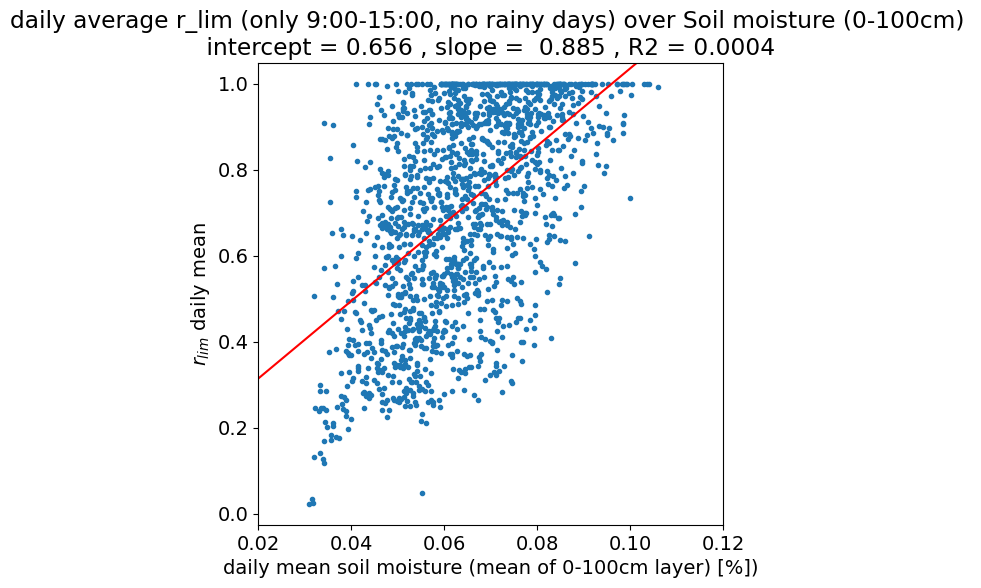

In [100]:
#plt.rcParams["figure.figsize"] = plt.rcParamsDefault
#plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.size': 14})

#df_tmp7d_1=df_tmp7d.copy()
#df_tmp1d_1=df_tmp1d_1.loc[df_tmp1d_1['LE/ET']<1.0]

fig,ax = plt.subplots()

#st="2011-04-01"
#ed="2011-09-30"

#df_GWS_7d['Stand (cm t.o.v. MV)']
#df_tmp7d_1=pd.merge_asof(df_tmp7d,df_GWS_7d['Stand (cm t.o.v. MV)'],left_index=True, right_index=True,direction='backward')


#df_tmp7d_1=df_tmp7d.merge(SM_1['SM_l1'], how='inner',left_index=True, right_index=True)

ax.scatter(SM_1['SM_l1'],SM_1['fstr'],marker='.')

#ax.set_ylim(0,1.2)
ax.set_xlim(0.02,0.12)

ax.set_ylabel(r'$r_{lim}$ daily mean')
ax.set_xlabel('daily mean soil moisture (mean of 0-100cm layer) [%])')

import scipy.stats as stats

SM_1=SM_1.dropna()
slope, intercept, r_value, p_value, std_err = stats.linregress(SM_1['SM_l1'], SM_1['fstr']) #linregres x, y . note r_value is Pearson's coefficient. R^2 is r_value**2
ax.set_title('daily average r_lim (only 9:00-15:00, no rainy days) over Soil moisture (0-100cm) \n intercept = 0.656 , slope =  0.885 , R2 = 0.0004 ')
print('R2: ',r_value**2)
print('slope, intercept:', slope, intercept)
ax.axline((0.0,intercept),slope=slope,c='r',label='slope')
#ax.axline ((0.0,0.0), slope=1, c='r',linestyle='dashed',label='1:1')

In [ ]:
#plt.rcParams["figure.figsize"] = plt.rcParamsDefault
#plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams["figure.figsize"] = (6,6)

#df_tmp7d_1=df_tmp7d.copy()
#df_tmp1d_1=df_tmp1d_1.loc[df_tmp1d_1['LE/ET']<1.0]

fig,ax = plt.subplots()

#st="2011-04-01"
#ed="2011-09-30"

#df_GWS_7d['Stand (cm t.o.v. MV)']
#df_tmp7d_1=pd.merge_asof(df_tmp7d,df_GWS_7d['Stand (cm t.o.v. MV)'],left_index=True, right_index=True,direction='backward')


#df_tmp7d_1=df_tmp7d.merge(SM_1['SM_l1'], how='inner',left_index=True, right_index=True)

ax.scatter(SM_1['SM_l2'],SM_1['LE/ET'])

ax.set_ylim(0,1.2)
ax.set_xlim(0.03,0.12)

ax.set_ylabel('fstr 7day mean')
ax.set_xlabel('soil moisture layer2 50-100cm (1/100 % volume)')

import scipy.stats as stats

SM_1=SM_1.dropna()
slope, intercept, r_value, p_value, std_err = stats.linregress(SM_1['SM_l2'], SM_1['LE/ET']) #linregres x, y . note r_value is Pearson's coefficient. R^2 is r_value**2
ax.set_title('7-day average fstr (only 9:00-15:00, no rainy days) over Soil moisture (50-100cm) \n intercept = 0.546 , slope =  2.95 , R2 = 0.00267 ')
print('R2: ',r_value**2)
print('slope, intercept:', slope, intercept)
ax.axline((0.0,intercept),slope=slope,c='r',label='slope')
#ax.axline ((0.0,0.0), slope=1, c='r',linestyle='dashed',label='1:1')

In [ ]:
df_soil_7d=df_soil.loc['2001-06-21':'2019-07-25'].resample('7D').mean()#['SM-Lit']
df_soil_7d['SM-003'].plot()

In [ ]:
df_tmp7d

In [ ]:
df_tmp7d.index

In [ ]:
df_soil_7d.columns